In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# 2. Load dataset
df = pd.read_csv("netflix_titles.csv.zip")
print("Shape of dataset:", df.shape)
print(df.head())

Shape of dataset: (8807, 12)
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   


/tmp/ipython-input-2427454182.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="Set2")


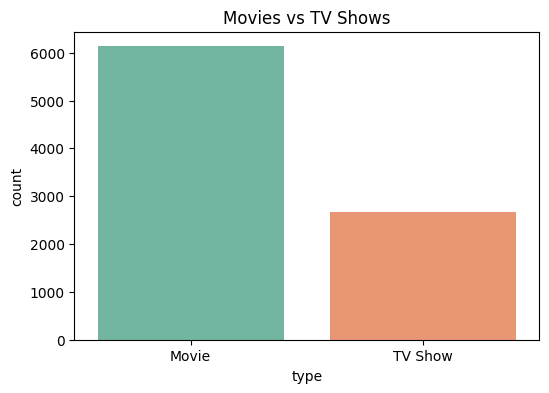

/tmp/ipython-input-2427454182.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="rating", order=df['rating'].value_counts().index, palette="Set3")


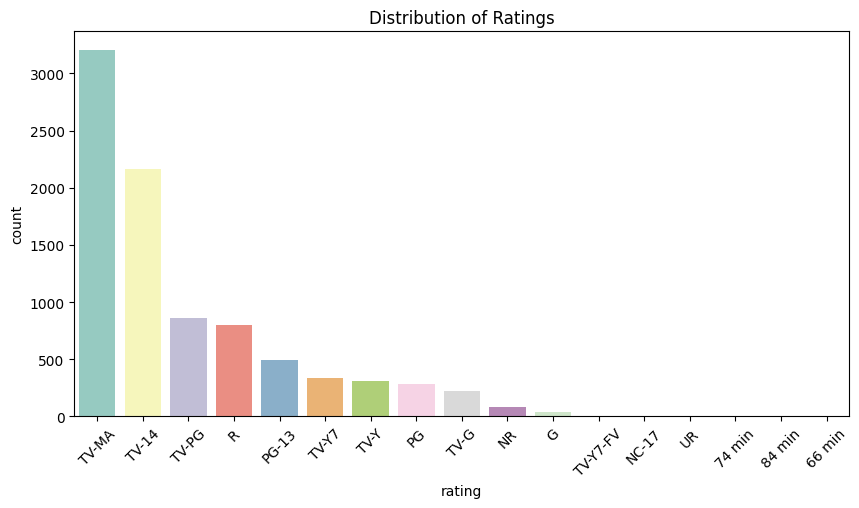

/tmp/ipython-input-2427454182.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")


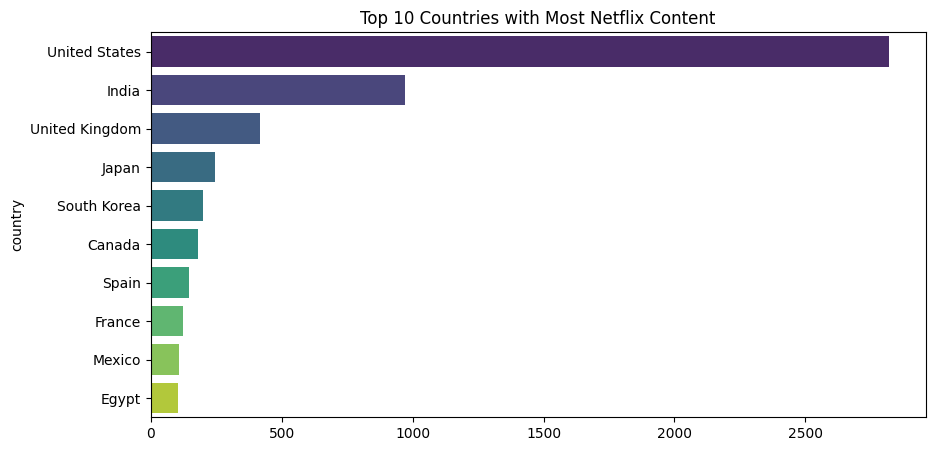

In [3]:
# 3. Content Distribution Analysis
# a. Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type", palette="Set2")
plt.title("Movies vs TV Shows")
plt.show()

# b. Ratings distribution
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="rating", order=df['rating'].value_counts().index, palette="Set3")
plt.title("Distribution of Ratings")
plt.xticks(rotation=45)
plt.show()

# c. Countries with most Netflix content
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries with Most Netflix Content")
plt.show()

/tmp/ipython-input-895512316.py:6: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)


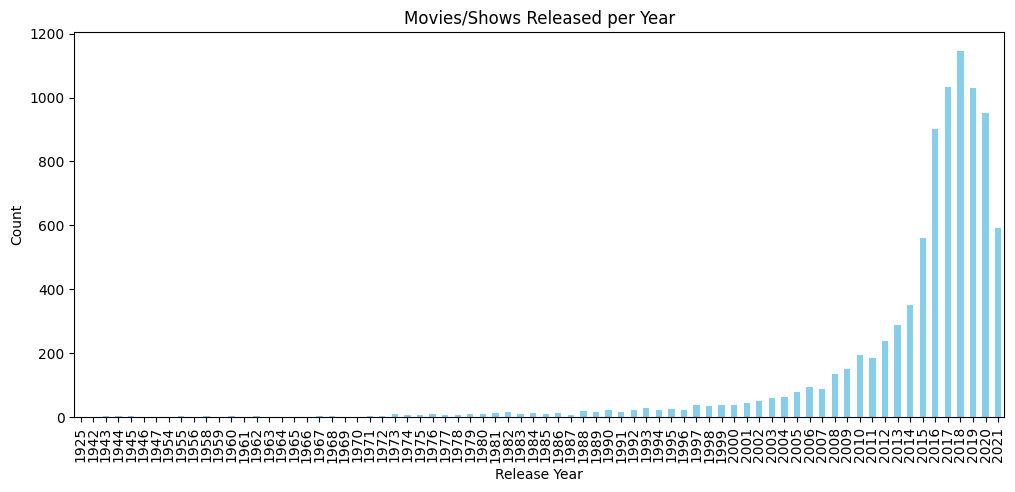

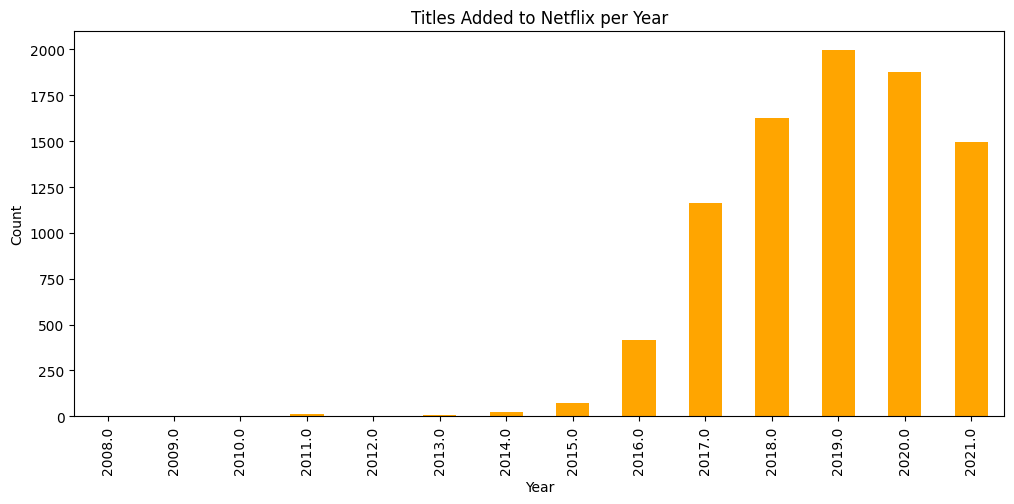

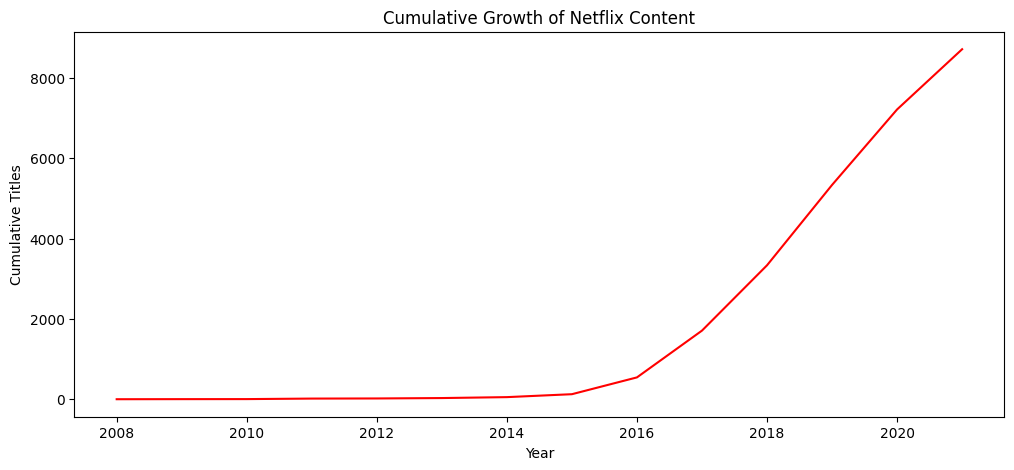

In [4]:
# 4. Time-Based Trend Analysis (Fixed)

df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')

# Fix date parsing (handle mixed formats)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce', infer_datetime_format=True)

# a. Year-wise releases
plt.figure(figsize=(12,5))
df['release_year'].value_counts().sort_index().plot(kind='bar', color="skyblue")
plt.title("Movies/Shows Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

# b. Year-wise additions to Netflix (based on date_added)
plt.figure(figsize=(12,5))
df['date_added'].dt.year.value_counts().sort_index().plot(kind='bar', color="orange")
plt.title("Titles Added to Netflix per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

# c. Growth trend (cumulative additions)
plt.figure(figsize=(12,5))
df['date_added'].dt.year.value_counts().sort_index().cumsum().plot(color="red")
plt.title("Cumulative Growth of Netflix Content")
plt.xlabel("Year")
plt.ylabel("Cumulative Titles")
plt.show()


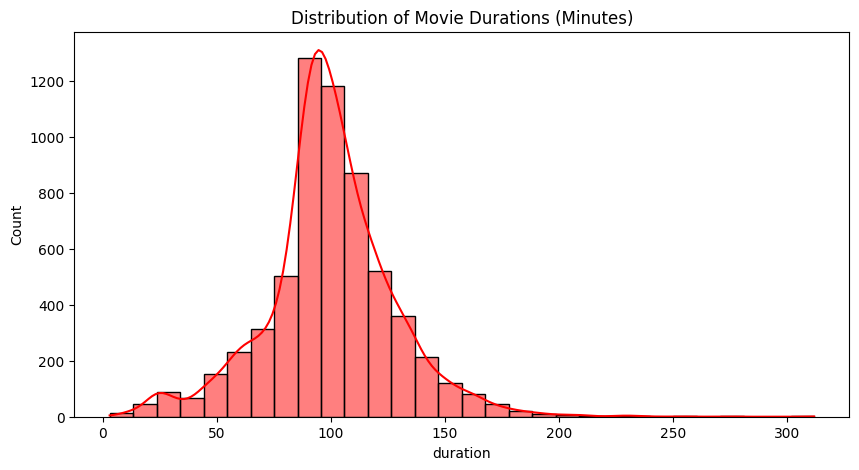

/tmp/ipython-input-2189305135.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=tv_seasons, palette="coolwarm")


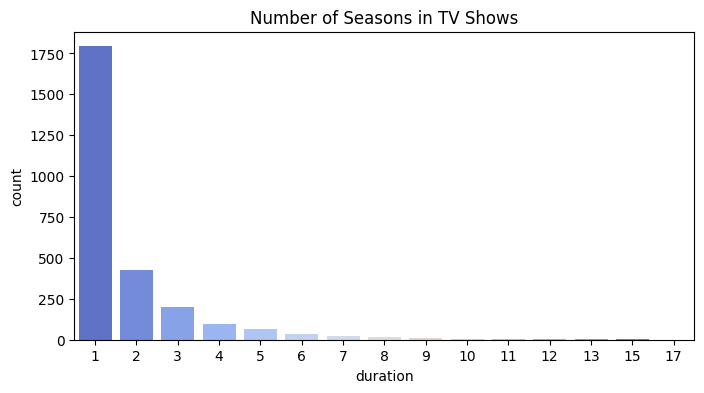

In [5]:
# 5. Duration & Content Type Analysis
# a. Movie durations
movie_durations = df[df['type']=='Movie']['duration'].str.replace(" min","").dropna()
movie_durations = movie_durations.astype(int)
plt.figure(figsize=(10,5))
sns.histplot(movie_durations, bins=30, kde=True, color="red")
plt.title("Distribution of Movie Durations (Minutes)")
plt.show()

# b. TV show seasons
tv_seasons = df[df['type']=='TV Show']['duration'].str.replace(" Season","").str.replace("s","").dropna()
tv_seasons = tv_seasons.astype(int)
plt.figure(figsize=(8,4))
sns.countplot(x=tv_seasons, palette="coolwarm")
plt.title("Number of Seasons in TV Shows")
plt.show()


/tmp/ipython-input-1733422176.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[g[1] for g in top10_genres], y=[g[0] for g in top10_genres], palette="mako")


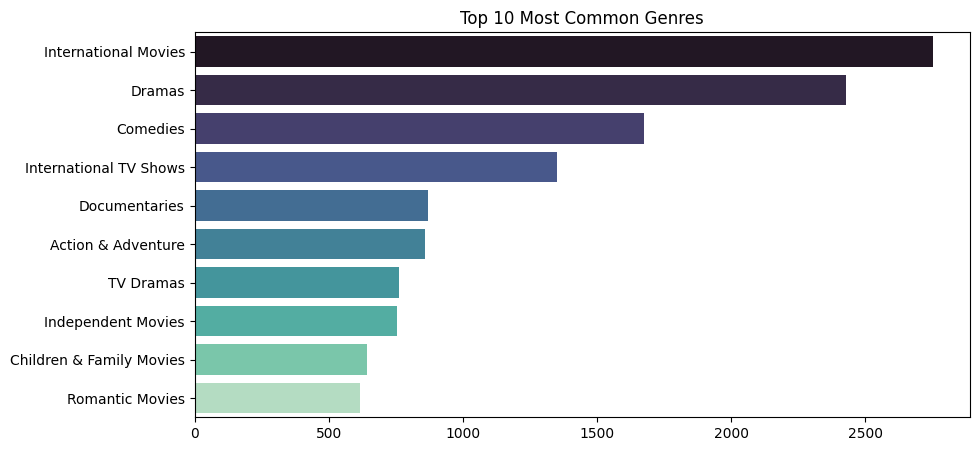

/tmp/ipython-input-1733422176.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="crest")


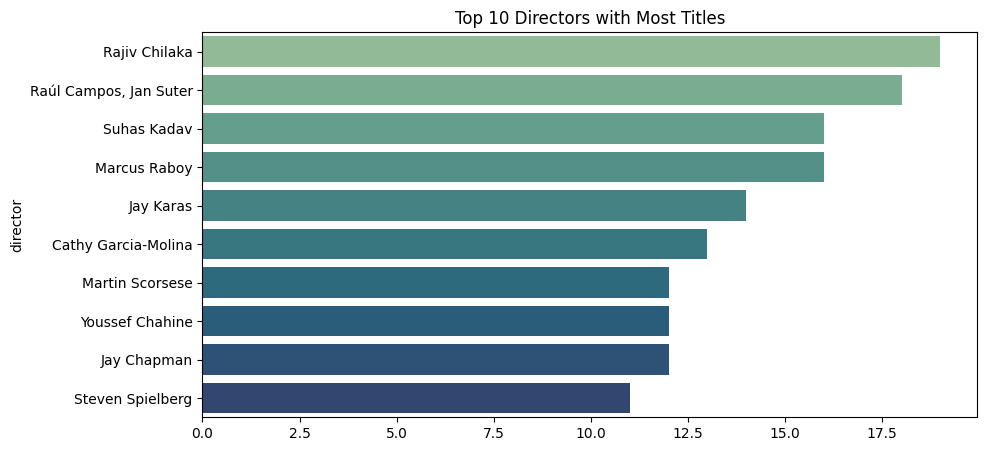

/tmp/ipython-input-1733422176.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[a[1] for a in top_actors], y=[a[0] for a in top_actors], palette="rocket")


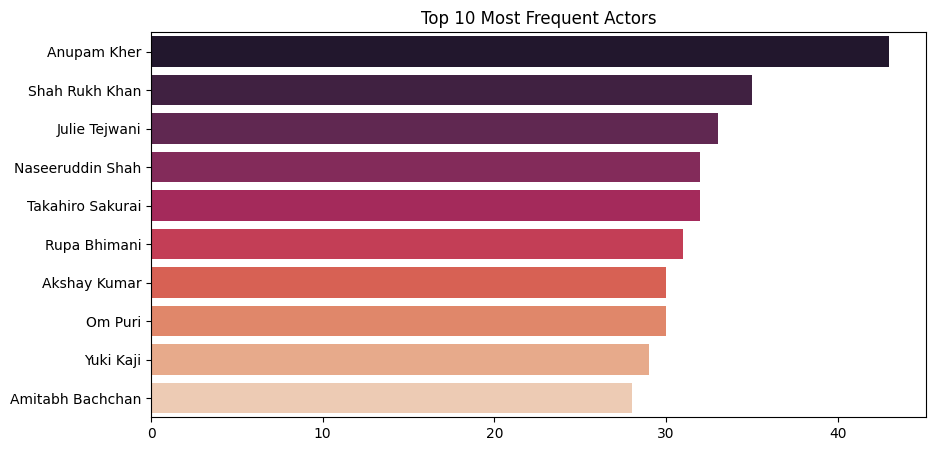

In [6]:
from collections import Counter

# 6. Genre & Categories Analysis
# Split listed_in column (genres/categories)
genres = df['listed_in'].dropna().str.split(', ')
all_genres = [g for sub in genres for g in sub]
top10_genres = Counter(all_genres).most_common(10)

plt.figure(figsize=(10,5))
sns.barplot(x=[g[1] for g in top10_genres], y=[g[0] for g in top10_genres], palette="mako")
plt.title("Top 10 Most Common Genres")
plt.show()

# Directors with most titles
top_directors = df['director'].dropna().value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="crest")
plt.title("Top 10 Directors with Most Titles")
plt.show()

# Actors with most appearances
cast = df['cast'].dropna().str.split(', ')
all_cast = [c.strip() for sub in cast for c in sub]
top_actors = Counter(all_cast).most_common(10)

plt.figure(figsize=(10,5))
sns.barplot(x=[a[1] for a in top_actors], y=[a[0] for a in top_actors], palette="rocket")
plt.title("Top 10 Most Frequent Actors")
plt.show()


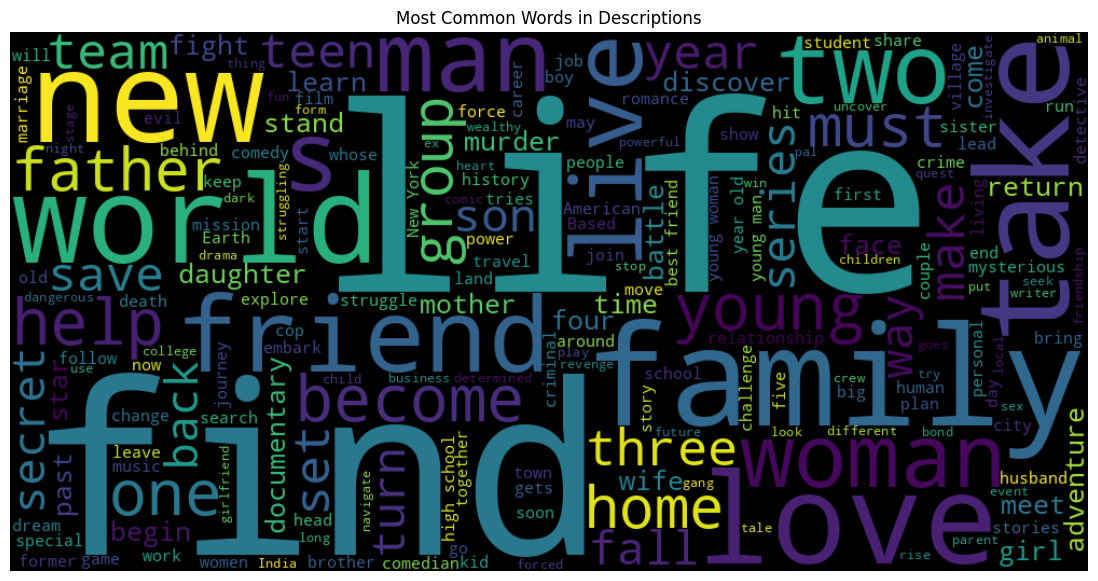

In [7]:
text = " ".join(desc for desc in df['description'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color="black").generate(text)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Descriptions")
plt.show()

/tmp/ipython-input-1060561507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['month_added'], palette="Set1")


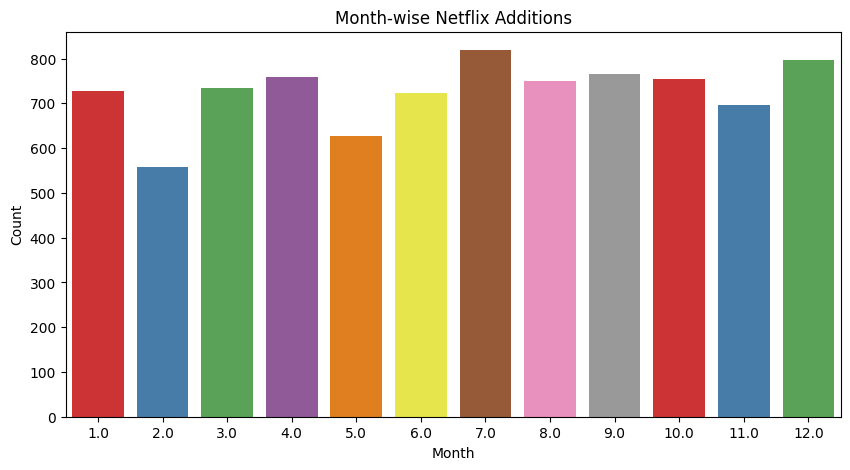

In [8]:
#8. Month-wise Additions (Not available, since no date_added)
df['month_added'] = df['date_added'].dt.month
plt.figure(figsize=(10,5))
sns.countplot(x=df['month_added'], palette="Set1")
plt.title("Month-wise Netflix Additions")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


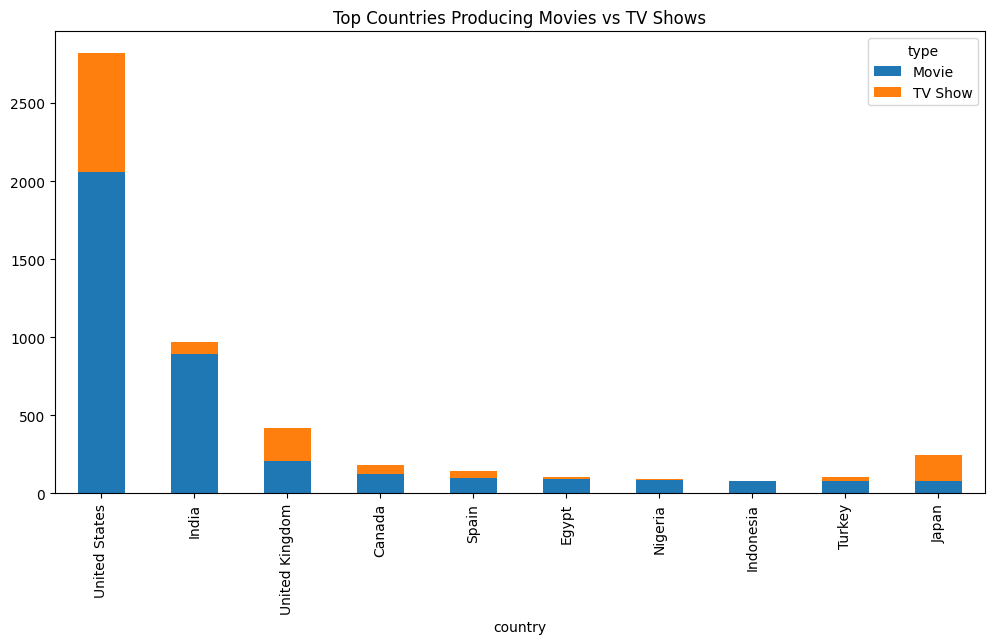

In [9]:
# 9. Countries producing more Movies vs TV Shows

country_type = df.groupby(['country','type']).size().unstack().fillna(0).sort_values("Movie", ascending=False).head(10)
country_type.plot(kind="bar", stacked=True, figsize=(12,6))
plt.title("Top Countries Producing Movies vs TV Shows")
plt.show()

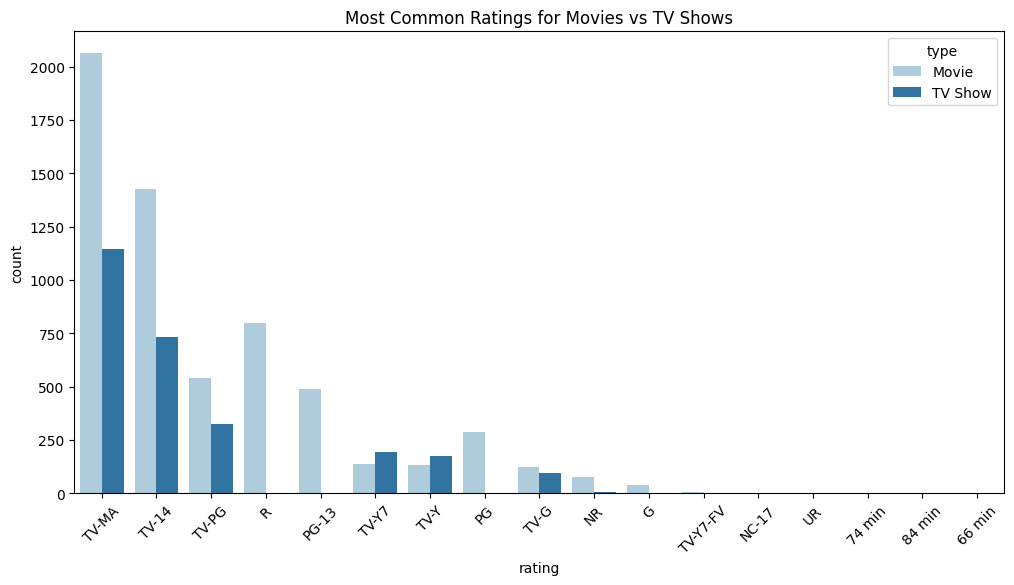

In [10]:
# 10. Most Common Ratings (Age certifications) for Movies vs TV Shows

plt.figure(figsize=(12,6))
sns.countplot(data=df, x="rating", hue="type", order=df['rating'].value_counts().index, palette="Paired")
plt.title("Most Common Ratings for Movies vs TV Shows")
plt.xticks(rotation=45)
plt.show()

In [11]:
# 11. Oldest & Newest Titles
print("Oldest Title:\n", df[df['release_year']==df['release_year'].min()][['title','release_year']])
print("\nNewest Title:\n", df[df['release_year']==df['release_year'].max()][['title','release_year']])

Oldest Title:
                                   title  release_year
4250  Pioneers: First Women Filmmakers*          1925

Newest Title:
                           title  release_year
1                 Blood & Water          2021
2                     Ganglands          2021
3         Jailbirds New Orleans          2021
4                  Kota Factory          2021
5                 Midnight Mass          2021
...                         ...           ...
1468  What Happened to Mr. Cha?          2021
1551                      Hilda          2021
1696               Polly Pocket          2021
2920              Love Is Blind          2021
8437     The Netflix Afterparty          2021

[592 rows x 2 columns]


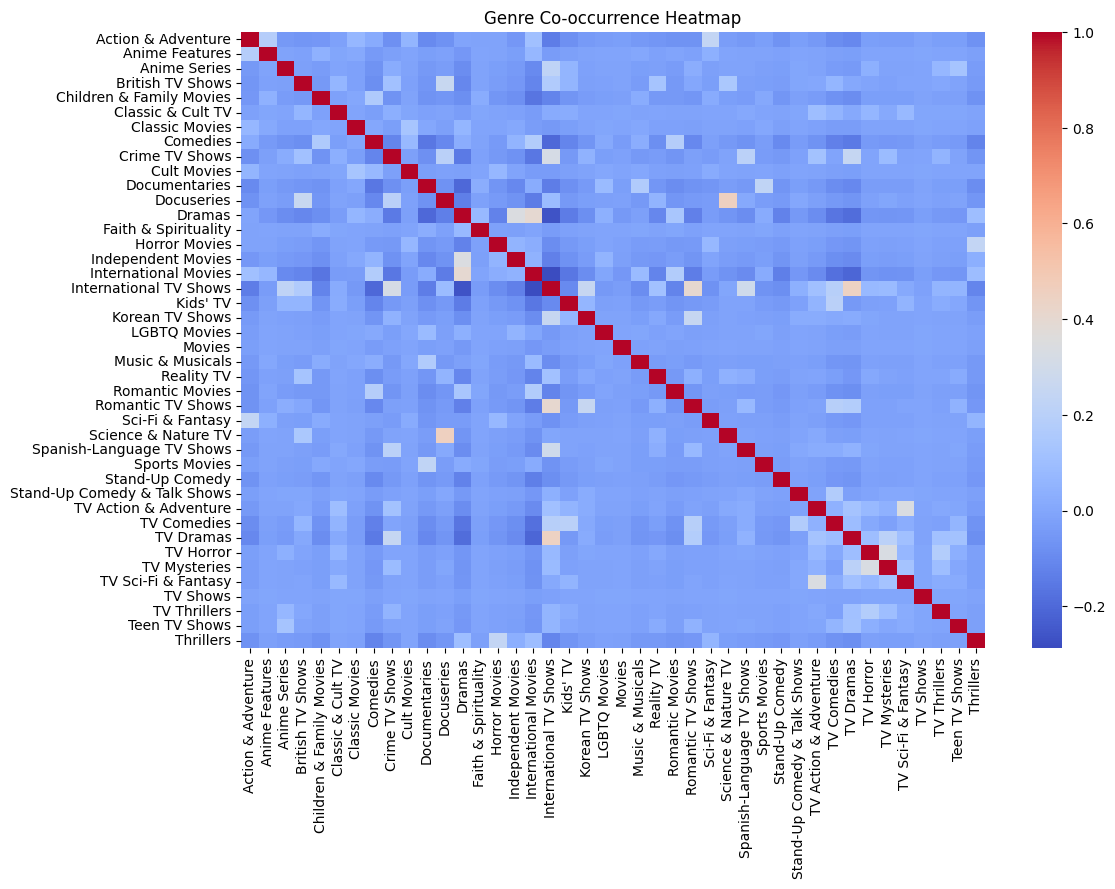

In [12]:
# 12. Genre Correlation Heatmap
genre_dummies = df['listed_in'].str.get_dummies(sep=', ')
plt.figure(figsize=(12,8))
sns.heatmap(genre_dummies.corr(), cmap="coolwarm")
plt.title("Genre Co-occurrence Heatmap")
plt.show()